In [ ]:
#Data Cleaning 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv",encoding='latin1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#these are large number of missing data . so best practice is to drop the rown with missing data


In [9]:
df = df.dropna(subset=['Description'])
df=df.dropna(subset=['CustomerID'])

In [12]:
df = df.dropna(subset=['Description'])  # remove rows without product info
df['CustomerID'] = df['CustomerID'].fillna('Unknown')  # label unknown customers


In [13]:
#checking the missing values again 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
#checking duplicate values and remove them if any
# Show all duplicate rows
duplicates = df[df.duplicated()]

# Count of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 5225


In [16]:
df = df.drop_duplicates()
print(f"Remaining rows: {len(df)}")
print(f"Duplicate rows now: {df.duplicated().sum()}")


Remaining rows: 401604
Duplicate rows now: 0


In [17]:
#fixing the data format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce') #converts to datetime


In [28]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')  #converts to numeric
df['CustomerID'] = df['CustomerID'].fillna('Unknown').astype(str)  #converts to string
#clean large strings
df['Description'] = df['Description'].str.strip().str.title()   
df['StockCode'] = df['StockCode'].astype(str).str.strip()

In [39]:
df.replace('?', np.nan, inplace=True)  # replace placeholders
df.dropna(inplace=True)  # remove rows with missing values


In [40]:
print(df.dtypes)  # Check data types
print(df.isnull().sum())  # Check for any remaining missing values


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID      object
Country         object
TotalPrice     float64
dtype: object
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,White Hanging Heart T-Light Holder,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,White Metal Lantern,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,Knitted Union Flag Hot Water Bottle,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,Red Woolly Hottie White Heart.,6,3.39,17850.0,United Kingdom,20.34


In [42]:
#checking revenue trend over time .. calculating revenue
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [37]:

monthly_revenue = df['TotalPrice'].resample('ME').sum()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [44]:
#plotting revenue over time (monthly revenue)

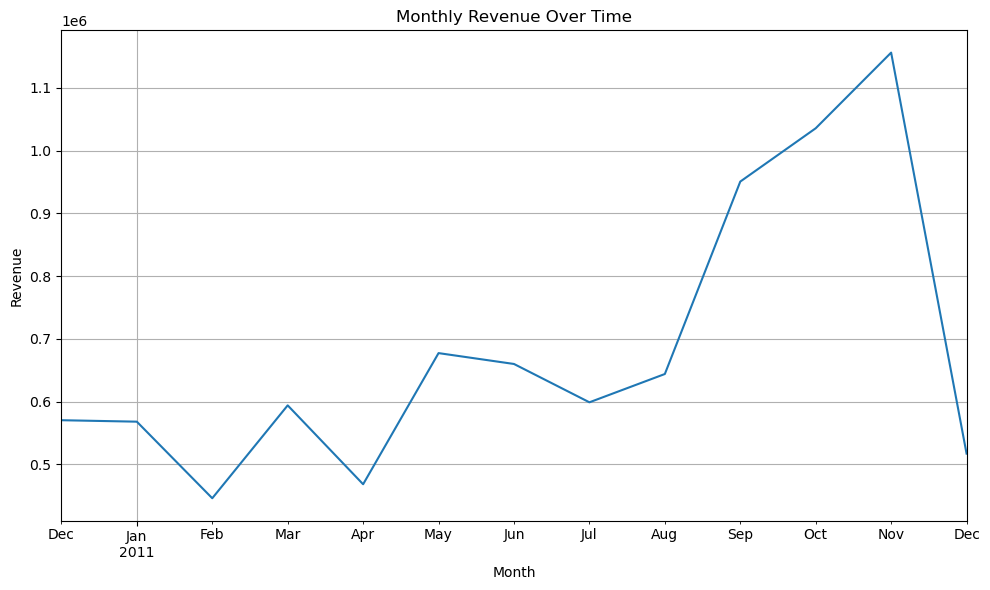

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
#plot shows the revenue was highest from aug to nov 
#checking daily revenue


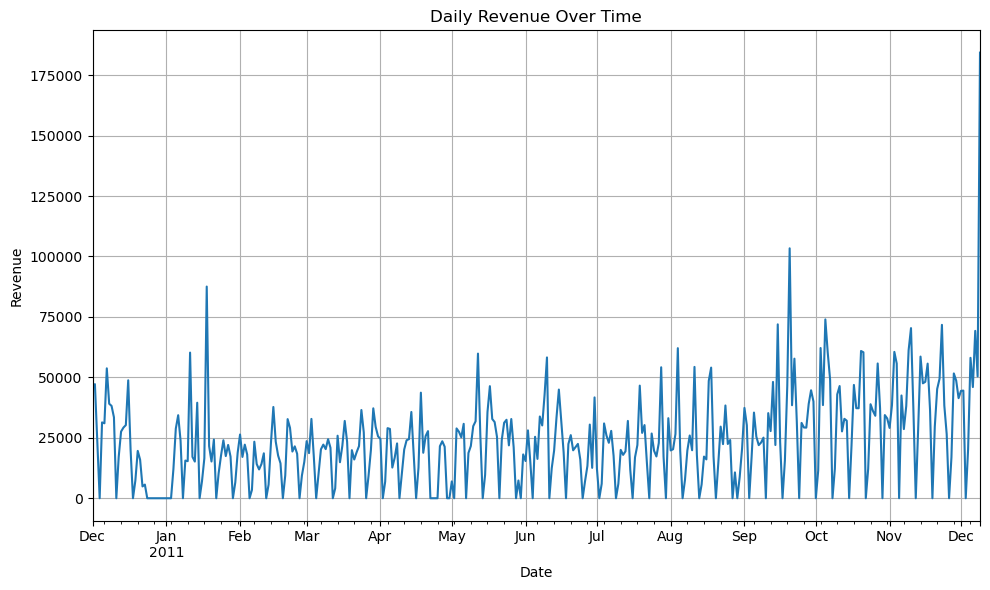

In [49]:
daily_revenue = df['TotalPrice'].resample('D').sum()

plt.figure(figsize=(10, 6))
daily_revenue.plot()
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

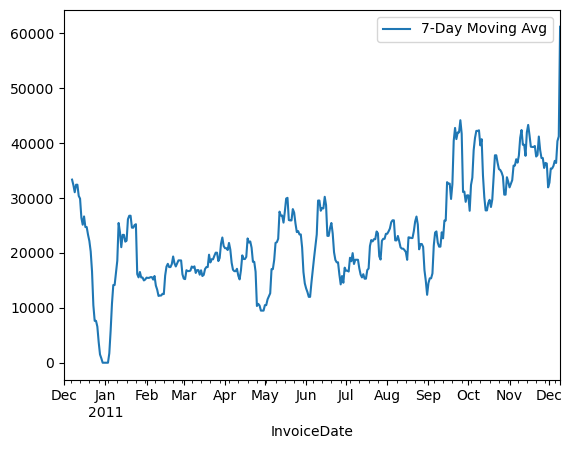

In [50]:
daily_revenue.rolling(window=7).mean().plot(label='7-Day Moving Avg')
plt.legend()


In [52]:
#calculting sales by products

sales_by_product=df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

In [53]:
sales_by_product

Description
Paper Craft , Little Birdie           168469.600
Regency Cakestand 3 Tier              142264.750
White Hanging Heart T-Light Holder    100392.100
Jumbo Bag Red Retrospot                85040.540
Medium Ceramic Top Storage Jar         81416.730
                                         ...    
Pink Crystal Guitar Phone Charm            0.850
Vintage Blue Tinsel Reel                   0.840
Set 12 Colouring Pencils Doiley            0.650
Hen House W Chick In Nest                  0.420
Pads To Match All Cushions                 0.003
Name: TotalPrice, Length: 3866, dtype: float64

In [ ]:
#finding catagory and making a coulmn to calculate the monthly revenue catagory based

In [69]:
def map_category(description):
    """
    Assigns a category based on keywords in the product description.
    """
    description = str(description).upper()  # ensure it's a string and in uppercase

    if 'MUG' in description or 'TEASPOON' in description:
        return 'Kitchenware'
    elif 'LANTERN' in description or 'T-LIGHT' in description:
        return 'Lighting & Decor'
    elif 'COAT RACK' in description or 'HANGER' in description:
        return 'Furniture & Home'
    elif 'BAG' in description or 'LUNCH BOX' in description:
        return 'Accessories'
    elif 'JIGSAW' in description or 'GAME' in description or 'TOY' in description:
        return 'Toys & Kids'
    elif 'DOORMAT' in description or 'BLOCK' in description:
        return 'Home Decor'
    elif 'CLOCK' in description or 'ALARM' in description:
        return 'Clocks & Timers'
    elif 'HAND WARMER' in description or 'HOTTIE' in description:
        return 'Winter Accessories'
    elif 'POSTAGE' in description:
        return 'Shipping'
    elif 'PARASOL' in description or 'TOWEL' in description:
        return 'Textiles'
    elif 'PAPER CHAIN' in description or 'KIT' in description:
        return 'DIY & Seasonal'
    elif 'NOTEBOOK' in description or 'PENCIL' in description:
        return 'Stationery'
    elif 'DECORATION' in description or 'ORNAMENT' in description:
        return 'Decorative Items'


In [70]:
df['Category'] = df['Description'].apply(map_category)   #makes a catagory column and apply function over it

#  Calculate monthly revenue by category
category_trend = df.groupby([df.index.to_period('M'), 'Category'])['TotalPrice'].sum().unstack(fill_value=0) 
category_trend.index = category_trend.index.to_timestamp()

#  Filter top 5 categories by total revenue
top_categories = df.groupby('Category')['TotalPrice'].sum().nlargest(5).index
filtered_trend = category_trend[top_categories]

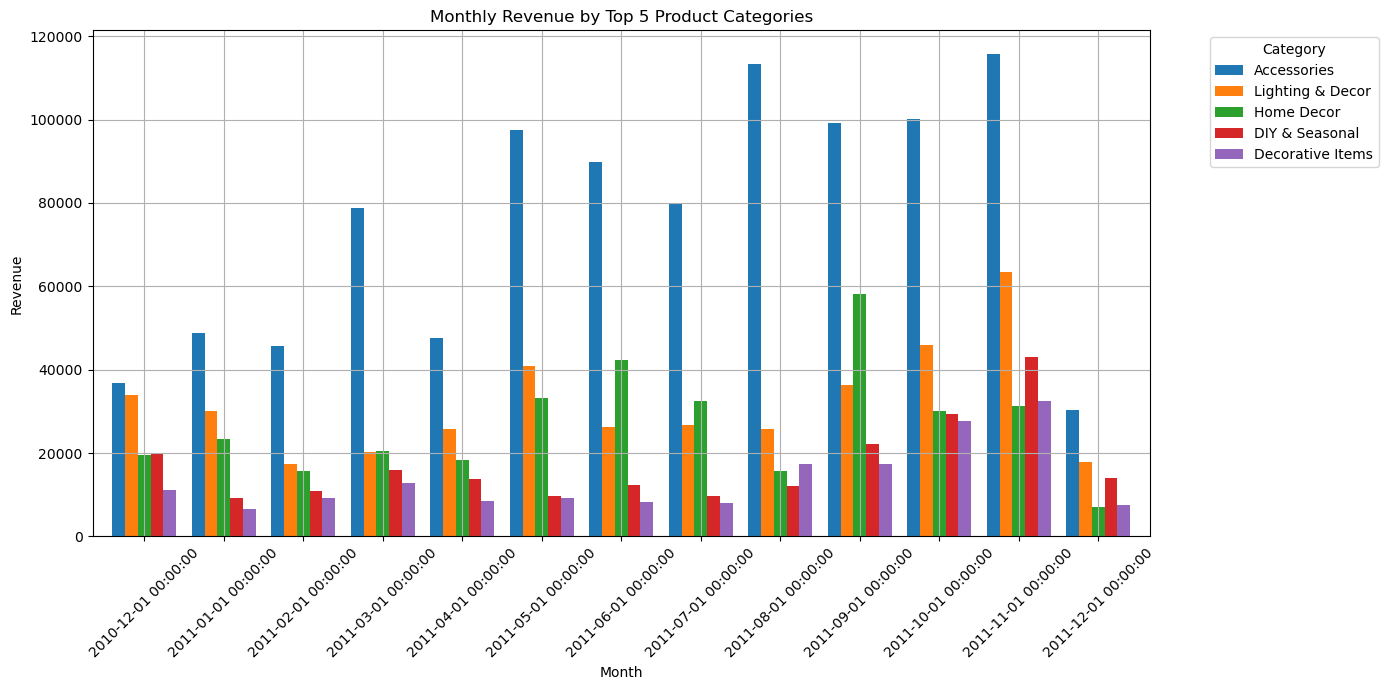

In [71]:
# Plot grouped bar chart
filtered_trend.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Monthly Revenue by Top 5 Product Categories')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
#plotting catagory in pir chart 
# Aggregate sales by category
category_sales = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)

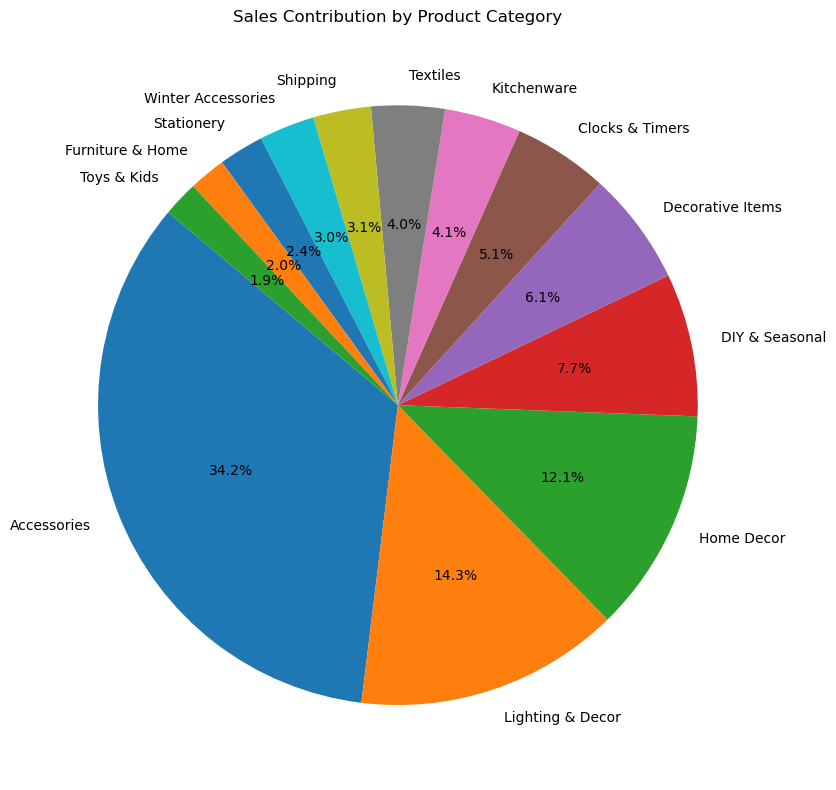

In [92]:
#finding sales by region and customer id

sales_by_region=df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution by Product Category')
plt.ylabel('')  # Hide y-axis label for better appearance
plt.tight_layout()
plt.show()

In [ ]:
#plotting the sales by region for top 10 countries

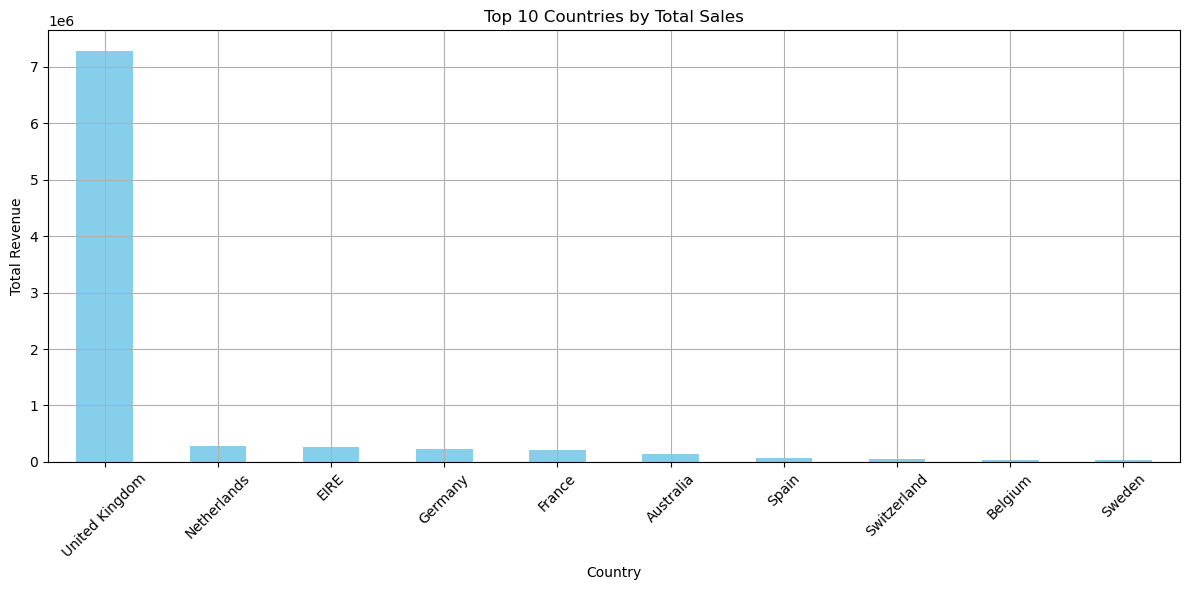

In [76]:

plt.figure(figsize=(12, 6))
sales_by_region.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [77]:
#sales by customer
sales_by_customer=df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

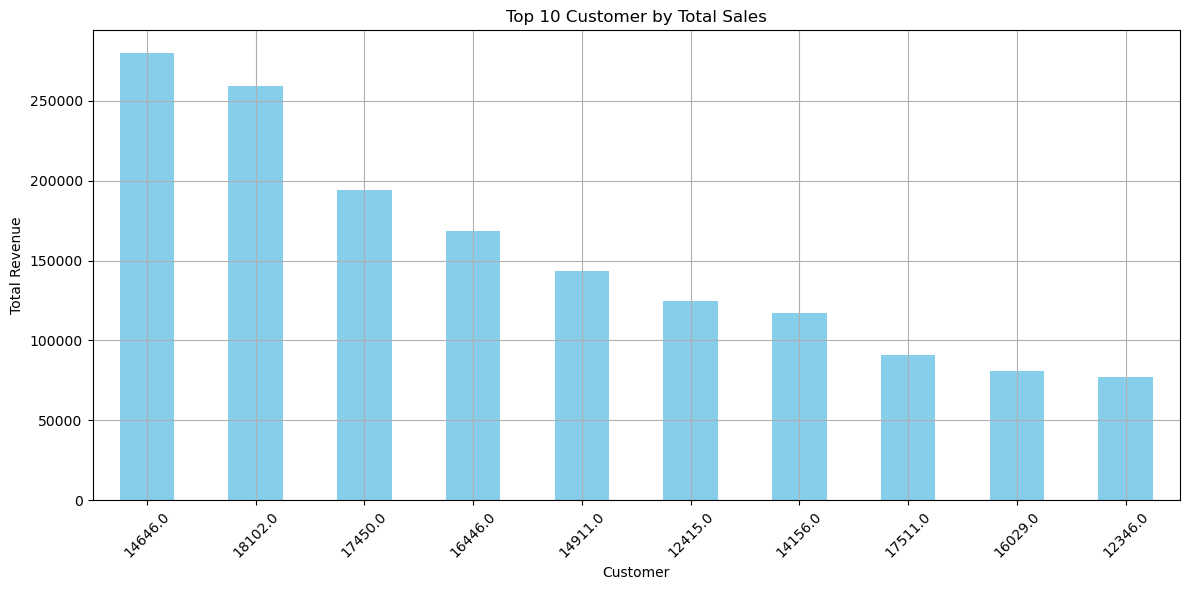

In [78]:
plt.figure(figsize=(12, 6))
sales_by_customer.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer by Total Sales')
plt.xlabel('Customer')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [79]:
# --- Segment Customers by Spending ---
def assign_segment(value):
    if value < 100:
        return 'Low'
    elif value < 1000:
        return 'Medium'
    else:
        return 'High'

In [ ]:
#creating customer segmetn

In [80]:
customer_total = sales_by_customer.reset_index()
customer_total.columns = ['CustomerID', 'TotalSpent']
customer_total['Segment'] = customer_total['TotalSpent'].apply(assign_segment)

In [83]:
# Counting customers in each segment
segment_count = customer_total['Segment'].value_counts()
segment_count

Segment
Medium    2516
High      1664
Low        158
Name: count, dtype: int64

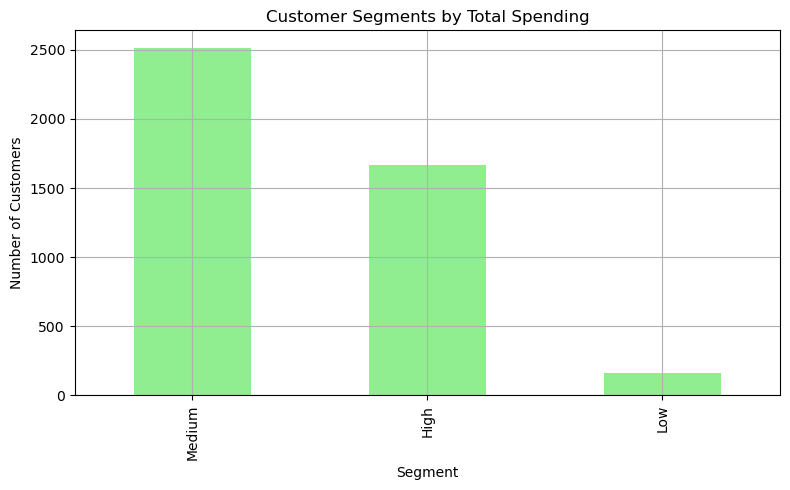

In [85]:
# Plot customer segments
plt.figure(figsize=(8, 5))
segment_count.plot(kind='bar', color='lightgreen')
plt.title('Customer Segments by Total Spending')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
#correlation between numeric columns
import seaborn as sns
numeric_cols = df[['Quantity', 'UnitPrice', 'TotalPrice']]

In [94]:
correlation_matrix = numeric_cols.corr()

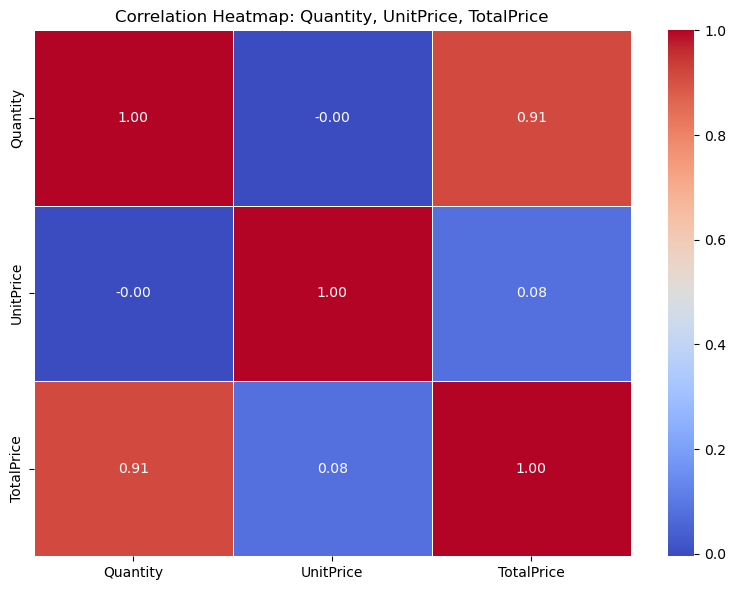

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Quantity, UnitPrice, TotalPrice')
plt.tight_layout()
plt.show()

Interpretation:
1)Quantity vs. TotalPrice: 0.63
Moderate positive correlation.
Makes sense: more items → higher total price (revenue).

2)UnitPrice vs. TotalPrice: 0.58
Also a moderate positive correlation.
Higher priced items tend to generate more revenue per line.

3)Quantity vs. UnitPrice: -0.01
Essentially no correlation.
Implies quantity purchased is not influenced by unit price — e.g., bulk discounts are not a visible pattern here

Key Findings:
Analysis of the sales data reveals several valuable insights. First, a small number of product categories contribute disproportionately to total revenue. For example, categories like "Lighting & Decor" and "Home Decor" account for a significant share of overall sales, as seen in both the bar chart and pie chart visualizations. In contrast, the "Other" category contains a large volume of products that don't fit neatly into defined segments—this suggests either data labeling issues or genuinely unique/low-selling items.

From a regional perspective, the United Kingdom is by far the largest contributor to revenue, significantly outpacing all other countries. Additionally, a small segment of top customers drives a large share of revenue. The customer segmentation based on total spending shows that while most customers fall into the "Low" spending tier, a small group of "High" spenders account for a sizable portion of revenue—highlighting the classic 80/20 rule often seen in retail.

Correlation analysis reveals a moderate positive relationship between Quantity and TotalPrice, indicating that larger quantities usually lead to higher transaction value. However, there's minimal correlation between UnitPrice and Quantity, suggesting that customers aren't particularly price-sensitive on a per-unit basis, or that unit prices are relatively stable across orders.

Suggested Actions:
Focus investment and marketing on top-performing categories, such as "Lighting & Decor" and "Home Decor." These are proven revenue drivers and likely have higher customer interest or margin potential.

Refine product categorization to reduce the size of the "Other" category. Many products may be misclassified or could be grouped into new, meaningful segments. This would improve reporting accuracy and help target product-level strategies more effectively.

Develop loyalty strategies for high-spending customers. This could include VIP discounts, early access to new products, or personalized promotions, as these customers significantly impact revenue despite being a small portion of the base.

Explore growth opportunities in underperforming regions. Since the UK dominates sales, there's room to increase marketing or local inventory in other countries with moderate revenue (e.g., Germany, France) to improve geographic diversification.

Bundle low-unit-price items to increase the average transaction size without relying on price discounts, especially given the weak correlation between price and quantity.

In [97]:
df.to_csv('ecommerce_cleaned_data.csv', index=False)